Este colab fue desarrollado por Arnold Charry Armero

# Coalco Company

Coalco produce carbón en tres minas y lo envía a
cuatro clientes. El costo por tonelada de producción de carbón, la ceniza.
y contenido de azufre (por tonelada) del carbón, y la producción
La capacidad (en toneladas) para cada mina se da en la Tabla 16.
El número de toneladas de carbón demandadas por cada cliente es
dado en la Tabla 17.
El costo (en dólares) de enviar una tonelada de carbón desde un
mina a cada cliente se da en la Tabla 18. Se requiere
que la cantidad total de carbón transportado contenga como máximo un 5% de cenizas
y como máximo un 4% de azufre. Formule un LP que minimice la
costo de satisfacer las demandas de los clientes.

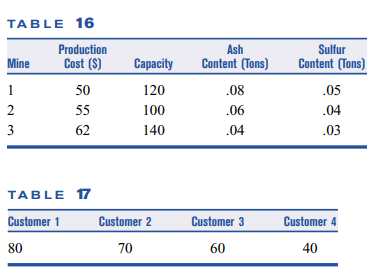

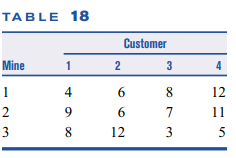

#Conjuntos

$ i = \text{Mina indexada por } i$

$ j = \text{Cliente indexado por } j$

# Parámetros

$ CP_{ij} = \textrm{Costo de producir en la mina }i  \textrm{ para el cliente } j$

$ CT_{ij} = \textrm{Costo de transportar desde la mina }i  \textrm{ hasta el cliente } j$

$ C_{i} = \textrm{Capacidad de producción en la mina }i$

$ D_{j} = \textrm{Demanda del cliente } j $

$ A_{i} = \textrm{Cantidad de ceniza por mina } i $

$ S_{i} = \textrm{Cantidad de azufre por mina } i $

## Variables de decisión

$ x_{ij} = \textrm{Cantidad producida en la mina }i \textrm{ para el cliente }j$

## Función Objetivo

$$ \textrm{Min } z = \sum_{j = 1}^{n}\sum_{i = 1}^{n} CP_{ij}\: x_{ij} +  \sum_{j = 1}^{n}\sum_{i = 1}^{n} CT_{ij}\: x_{ij} $$

## Restricciones

No se puede rebasar la capacidad de cada mina,

$$ \sum_{j = 1}^{n} x_{ij} \leq C_{i}, \forall i$$

Se debe contener suficiente ceniza,

$$ \sum_{i = 1}^{n} x_{ij} \:A_{i} \leq 0.5 \sum_{i = 1}^{n} x_{ij}, \forall j$$

Se debe contener suficiente azufre,

$$ \sum_{i = 1}^{n} x_{ij} \:S_{i} \leq 0.4 \sum_{i = 1}^{n} x_{ij}, \forall j$$

Se debe satisfacer la demanda,

$$ \sum_{i = 1}^{n} x_{ij} = D_{j}, \forall j$$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.8 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
minas = range(3)
clientes = range(4)

In [ ]:
#Parámetros

CP = [[50, 50, 50, 50], [55, 55, 55, 55], [62, 62, 62, 62]]

CT = [[4, 6, 8, 12], [9, 6, 7, 11], [8, 12, 3, 5]]

C = [120, 100, 140]

D = [80, 70, 60, 40]

A = [0.08, 0.6, 0.4]

S = [0.05, 0.04, 0.03]

In [6]:
# Crear la instancia del modelo
model = LpProblem(name="Coalco_Company", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (minas, clientes), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([[CP[i][j] * X[i][j] for i in minas] for j in clientes]) + lpSum([[CT[i][j] * X[i][j] for i in minas] for j in clientes])

# Agregar las restricciones

for i in minas:
  model += lpSum([X[i][j] for j in clientes]) <= C[i]

for j in clientes:
  model += lpSum([X[i][j] * A[i] for i in minas]) <= 0.5 * lpSum([X[i][j] for i in minas])

for j in clientes:
  model += lpSum([X[i][j] * S[i] for i in minas]) <= 0.4 * lpSum([X[i][j] for i in minas])

for j in clientes:
  model += lpSum(X[i][j] for i in minas) == D[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0_0 = 80.0
X_0_1 = 28.461538
X_0_2 = 11.538462
X_0_3 = 0.0
X_1_0 = 0.0
X_1_1 = 41.538462
X_1_2 = 48.461538
X_1_3 = 10.0
X_2_0 = 0.0
X_2_1 = 0.0
X_2_2 = 0.0
X_2_3 = 30.0
Costos totales = $ 14791.538462
